In [129]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [130]:
def convert_dg_to_dag(input_list: list) -> nx.DiGraph:
    """
    Converts a directed graph (DG) to a directed acyclic graph (DAG).

    Parameters:
    input_list (list): List of lists of strings (a degenerate string)

    Example of input_list:
    [['C', 'T', 'A', 'G'], ['A', 'T', 'T'], ['T', 'T', 'T'], ['A', 'G', 'G', 'G', 'G'], ['A', 'G'], []]

    Returns:
    nx.DiGraph: The converted DAG.
    """

    graph = nx.DiGraph()
    graph.add_node(0, label="$")
    previous_dummy_node = 0
    node_id = 1

    for sublist in input_list:
        current_level = []
        if not sublist:  # if the sublist is empty, consider it a dummy node.
            continue

        for item in sublist: # iterate over the characters in the string in the sublist
            graph.add_node(node_id, label=item)
            graph.add_edge(previous_dummy_node, node_id)
            current_level.append(node_id)
            node_id += 1

        # create a new dummy node
        previous_dummy_node = node_id
        graph.add_node(node_id, label="$")
        node_id += 1

        # connect the current level to the new dummy node
        for node in current_level:
            graph.add_edge(node, previous_dummy_node)

    return graph

def draw_graph(G):
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="dot", root=0, args="-Grankdir=LR")
    node_labels = nx.get_node_attributes(G, "label")

    # Create a color map
    color_map = []
    for node in G:
        if node_labels[node] == "$":
            color_map.append('pink')
        else:
            color_map.append('lightblue')

    nx.draw(G, pos, node_color=color_map, with_labels=True, labels=node_labels)

def generate_degenerate_strings(max_length, num_subsets):
    alphabet = ['A', 'C', 'G', 'T']
    degenerate_strings = []

    for _ in range(num_subsets):
        subset_length = random.randint(0, max_length)  # Length of subset can be 0 (empty set)
        subset = []
        for _ in range(subset_length):
            subset.append(random.choice(alphabet))
        degenerate_strings.append(subset)

    return degenerate_strings


In [133]:
X = generate_degenerate_strings(5, 5)
print(X)

[['C', 'C', 'T', 'C', 'G'], ['C', 'C', 'C'], ['A', 'G'], ['A', 'T'], ['A']]


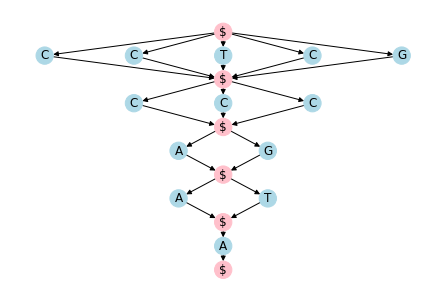

In [134]:
G = convert_dg_to_dag(X)
draw_graph(G)